## Objectives:

 * Learn how manipulate numeric arrays
 * Know how to calculate basic statistics on arrays: average, standard deviation, variance
 * Learn how to generate contour plots
 * Continue learning how to manipulate date/time information
 * Learn how to read netCDF output


In previous weeks, we have (perhaps without knowing it) been working with `numpy` arrays.  `numpy` is the name of the 'numerical python' library, which provides a suite of functions and functionality similar to Matlab; it allows simple and fast operations on arrays.  This is the bread-and-butter of Python-based data analysis.

In [1]:
# import everything from the numpy library
from numpy import *
# we could instead write `import numpy`, in which case all numpy functions would have to be prefaced with `numpy`
# for example, a = numpy.array([1,2,3]) instead of a = array([1,2,3])

# create a list of numbers (similar to the precip example)
precip_test = [1,0,0,0,0,1,1,1,1,0,0,0]

# convert the list to an array
precip_test = array(precip_test)

print(precip_test)

[1 0 0 0 0 1 1 1 1 0 0 0]


We've seen this before: the variable `precip_test` is a one-dimensional array.  You can access elements within it in a variety of ways:

In [2]:
# get the first 5 values
dum = precip_test[:5]
print('first 5 values:',dum)

# get the last 3 values
dum = precip_test[-3:]
print('last 3 values:',dum)

# get the 4th value (remember, we start counting at 0)
dum = precip_test[3]
print('4th value:',dum)

# get the last value
dum = precip_test[-1]
print('last value:',dum)

first 5 values: [1 0 0 0 0]
last 3 values: [0 0 0]
4th value: 0
last value: 0


We can do similar with two-dimensional arrays:

In [3]:
# create a list of 3 lists
two_dim_test = [ [1,2,3], \
                 [4,5,6], \
                 [7,8,9] ]

# print(the first item in the list (which itself is a list))
print('first item in list:',two_dim_test[0])

# convert the list of lists into a 2D array
two_dim_test = array(two_dim_test)

# print(the shape of the array)
print('shape of `two_dim_test`',two_dim_test.shape)

# print(the array)
print('entire 2D array:\n',two_dim_test)

# print(the value at indices in the first row, first column)
dum =  two_dim_test[0,0]
print('Value at indices (0,0):',dum)

# print(the value at the 3rd row, 2nd column)
dum =  two_dim_test[2,1]
print('Value at indices (2,1):',dum)

# print(the value at the last row, last column)
dum = two_dim_test[-1,-1]
print('Value at last row, last column:',dum)

# print(the value of the 2nd row)
dum = two_dim_test[1,:]
print('Values in 2nd row:',dum)

first item in list: [1, 2, 3]
shape of `two_dim_test` (3, 3)
entire 2D array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Value at indices (0,0): 1
Value at indices (2,1): 8
Value at last row, last column: 9
Values in 2nd row: [4 5 6]


The idea extends to 3-dimensional and higher-dimensional arrays.

# Working with real arrays

I downloaded a file from the 20th century reanalysis `air.sfc.mon.mean.nc` by going to the [20th Century Reanalysis monthly surface data page](http://www.esrl.noaa.gov/psd/data/gridded/data.20thC_ReanV2c.monolevel.mm.html) and clicking the [`air.sfc.mon.mean.nc` link](ftp://ftp.cdc.noaa.gov/Datasets/20thC_ReanV2c/Monthlies/gaussian/monolevel/air.sfc.mon.mean.nc) (clicking that link should download it).

In [4]:
""" load temperature data from a reanalysis file """
%matplotlib inline
import netCDF4 as nc # load the netCDF library
import pylab as PP # load the plotting library
import matplotlib as mpl # import matplotlib

#Set the default font for plots
font = { 'family' : 'sans-serif', \
         'size' : '15', \
         'weight' : 'bold'}
mpl.rc('font', **font)

# set the reanalysis file na
infile = '../data/air.sfc.mon.mean.nc'

# open the netCDF file and read the temperature data
# (note that I knew in advance the name of the variable that I'm reading; I'll not get into how here)
fin = nc.Dataset(infile,'r')

# load the temperature variable
temperature_var = fin.variables['air']

# get the temperature array (this notation is specific to netCDF)
temperature = temperature_var[:]

# get the latitude and longitude arrays
lat = fin.variables['lat'][:]
lon = fin.variables['lon'][:]

In [5]:
# print(the shape of the array)
print('shape of temperature array:',temperature.shape)

# note that I know in advance what each array dimension corresponds to: time, latitude, longitude
# but we can print(them here)
print('dimension of temperature array:',temperature_var.dimensions)

# lets extract the first time index
first_temperature = temperature[0,:,:]

fig,ax = PP.subplots()
# and plot the temperature array
cplt = ax.pcolormesh(lon,lat,first_temperature)
# plot a colorbar
fig.colorbar(cplt,label='Temp [{}]'.format(temperature_var.units))

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
PP.show()

shape of temperature array: (1968, 94, 192)
dimension of temperature array: ('time', 'lat', 'lon')


If you look at the image above, you can see the outlines of continents!  What time of year might this be, based on the temperature patterns?

We can know for sure:

In [6]:
# get the time variable
time_var = fin.variables['time']

# extract time index 0
first_time = time_var[0]

# convert the time (numeric) to a date
first_date = nc.num2date(first_time,time_var.units)

# print(the date)
print(first_date)

1851-01-01 00:00:00


Cool, it is january.  Let's plot the global mean temperature as a function of time.

In [7]:
""" calculate global mean temperature """

# calculate the average over the latitude (the 2nd dimension) and longitude (the 3rd dimension) simultaneously
# there are two ways to do this:
# if you have a new version of numpy (e.g., 1.10), you can do this in one command
#global_mean_temperature = mean(temperature,axis=[1,2])


# if not, you'll need to calculate the average by summing the last two dimensions manually
# sum over the last dimension (longitude)
global_mean_temperature_sum = sum(temperature,axis=-1)
# sum over the next-to-last dimension (latitude; this is the last dimension in global_mean_temperature_sum)
global_mean_temperature_sum = sum(global_mean_temperature_sum,axis=-1)
# and then divide by the number of lat/lon points
global_mean_temperature = global_mean_temperature_sum/(temperature.shape[1]*temperature.shape[2])


# Note that the above methods aren't, strictly speaking, the correct way to calculate the average on a sphere
# (think of the spherical coordinate jacobian, if you've taken multivariate calculus), but it is good enough for
# this purpose.
do_correct_weighting = True
if do_correct_weighting:
    # calculate the area-weighting factor
    weights = cos(lat*pi/180)
    # calculate the weighted sum (note the use of weights[newaxis,:], which tells numpy how to do the
    # otherwise-ambigious array*vector multiplication)
    global_mean_temperature_sum = sum(temperature,axis=-1)
    global_mean_temperature_sum = sum(global_mean_temperature_sum*weights[newaxis,:],axis=-1)
    # calculate the sume of the weights
    weight_sum = sum(weights)
    # calculate the mean
    global_mean_temperature = global_mean_temperature_sum/(weight_sum*temperature.shape[2])


In [8]:
# extract the time variable and convert it to fractional years (we've seen this before)
times = time_var[:]

# convert to datetime
dates = nc.num2date(times,time_var.units)

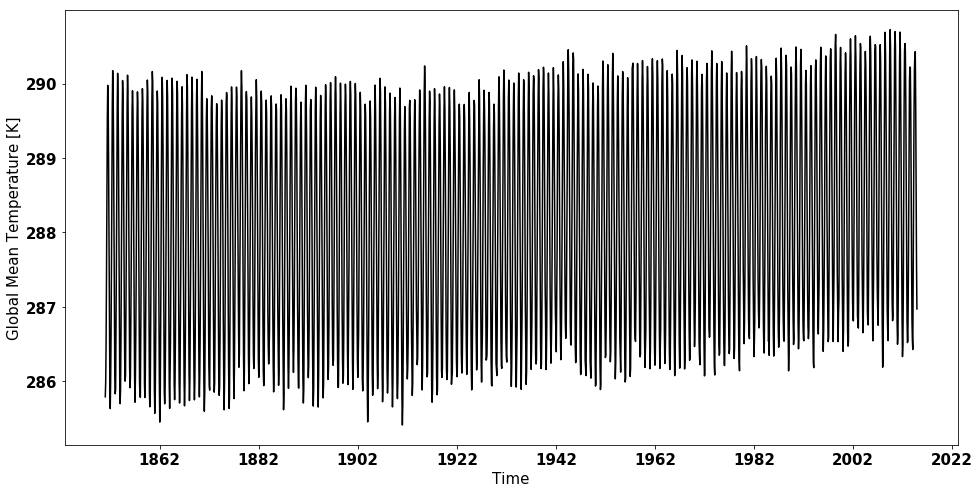

In [9]:
""" plot global mean temperature vs time """

fig,ax = PP.subplots(figsize=(16,8))

ax.plot(dates,global_mean_temperature,'k-')

ax.set_xlabel('Time')
ax.set_ylabel('Global Mean Temperature [K]')

PP.show()

Now let's clean up this timeseries by calculating annual averages.  We can do this by reshaping the timeseries so
that it has the shape [#,12].  This converts it into an array where each row corresponds to a year, and each column corresponds to the month in the year.  (This only works if the array length is divisble by 12: if it starts and ends with a complete year.)  We can then average over the month dimension to get the yearly average.

In [10]:
# reshape the global mean temperature variable (note that the '-1' tells reshape() that it should deduce the size
# of that dimension. We could have manually calculated the value by inserting len(global_mean_temperature)/12.
gmt_by_month = reshape(global_mean_temperature,[-1,12])

# print(the shape)
print('shape of gmt_by_month:',gmt_by_month.shape)

# do the same with time
time_by_month = reshape(times,[-1,12])

# average over the month dimension
gmt_yearly = average(gmt_by_month,axis=-1)
time_yearly = average(time_by_month,axis=-1)

# convert from time-since units to a datetime object
dates_yearly = nc.num2date(time_yearly, time_var.units)

shape of gmt_by_month: (164, 12)


In [11]:
""" plot global mean temperature vs time (by year now) """

fig,ax = PP.subplots(figsize=(16,8))

ax.plot(dates_yearly,gmt_yearly,'k-',linewidth=3)

ax.set_xlabel('Time')
ax.set_ylabel('Global Mean Temperature [K]')

PP.show()

Now how cool was that?